# XGBoost

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Memuat Data


In [2]:
X_train = pd.read_csv('dataset/X_train.csv')
X_test = pd.read_csv('dataset/X_test.csv')
y_train = pd.read_csv('dataset/y_train.csv').values.ravel()
y_test = pd.read_csv('dataset/y_test.csv').values.ravel()

## Pelatihan Model dengan Tuning


In [3]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, cv=5, scoring='r2')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_

print("\n=== XGBoost Best Parameters ===")
print(xgb_grid.best_params_)


=== XGBoost Best Parameters ===
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


## Evaluasi Model


In [4]:
y_train_pred = xgb_best.predict(X_train)
y_test_pred = xgb_best.predict(X_test)

metrics = {
    'Model': 'XGBoost',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R2': r2_score(y_train, y_train_pred),
    'Test R2': r2_score(y_test, y_test_pred)
}

cv_scores = cross_val_score(xgb_best, X_train, y_train, cv=5, scoring='r2')
metrics['CV R2 Mean'] = cv_scores.mean()
metrics['CV R2 Std'] = cv_scores.std()

## Ringkasan Hasil


In [5]:
results_df = pd.DataFrame([metrics])
print("\n=== Hasil Evaluasi XGBoost ===")
print(results_df)


=== Hasil Evaluasi XGBoost ===
     Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R2   Test R2  \
0  XGBoost   0.276531  0.278014    0.354715   0.358528   0.87394  0.872412   

   CV R2 Mean  CV R2 Std  
0    0.872089   0.001297  


## Visualisasi Prediksi vs Aktual


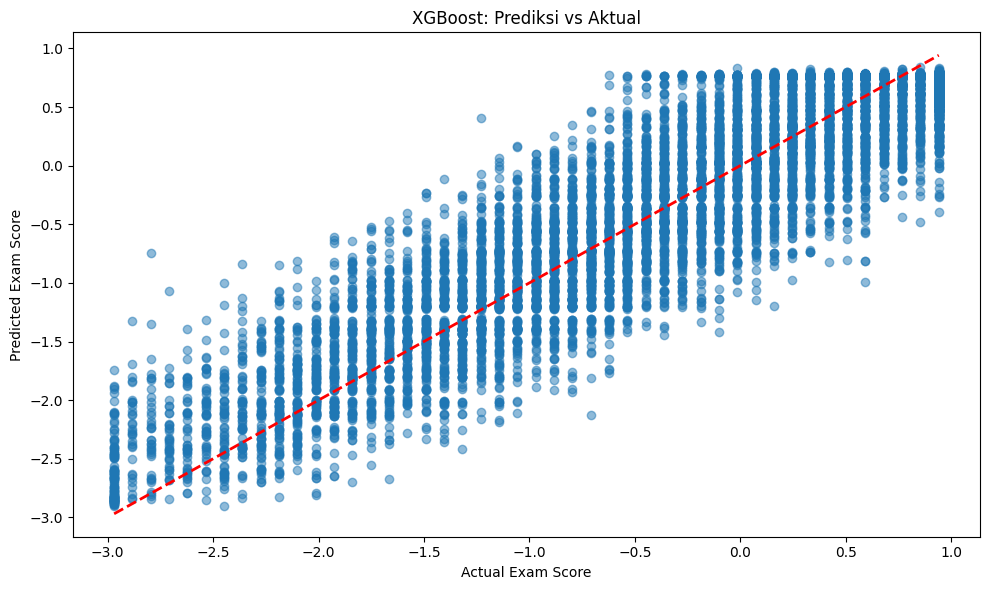

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('XGBoost: Prediksi vs Aktual')
plt.tight_layout()
plt.show()

## Visualisasi Metrik


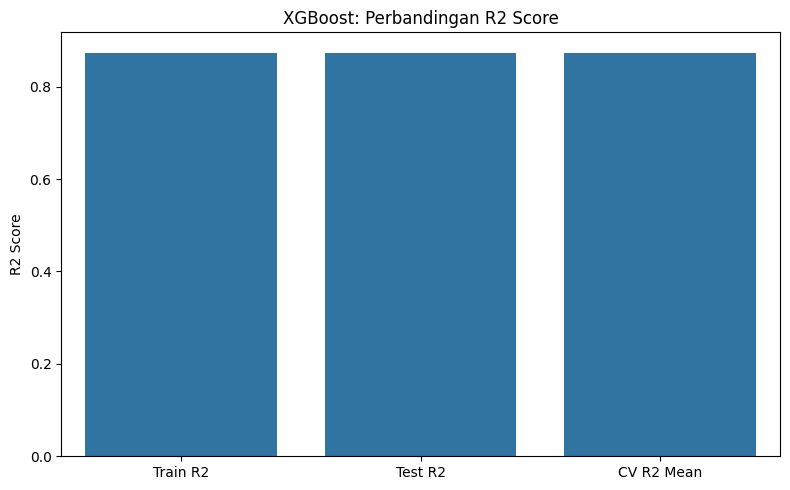

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['Train R2', 'Test R2', 'CV R2 Mean'], y=[metrics['Train R2'], metrics['Test R2'], metrics['CV R2 Mean']])
plt.title('XGBoost: Perbandingan R2 Score')
plt.ylabel('R2 Score')
plt.tight_layout()
plt.show()

## Menyimpan Model dan Hasil


In [8]:
joblib.dump(xgb_best, 'xgboost_model.pkl')
results_df.to_csv('xgboost_results.csv', index=False)
print("\nModel disimpan sebagai 'xgboost_model.pkl'")
print("Hasil evaluasi disimpan sebagai 'xgboost_results.csv'")


Model disimpan sebagai 'xgboost_model.pkl'
Hasil evaluasi disimpan sebagai 'xgboost_results.csv'
